<a href="https://colab.research.google.com/github/devanjohnson/test/blob/master/03_random_walk_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The random walk

In [1]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (9,6)

## Simulate a random walk

In [4]:
# @title Default title text
np.random.seed(0)

steps = np.random.standard_normal(1000)
steps[0] = 0

random_walk = np.cumsum(steps)

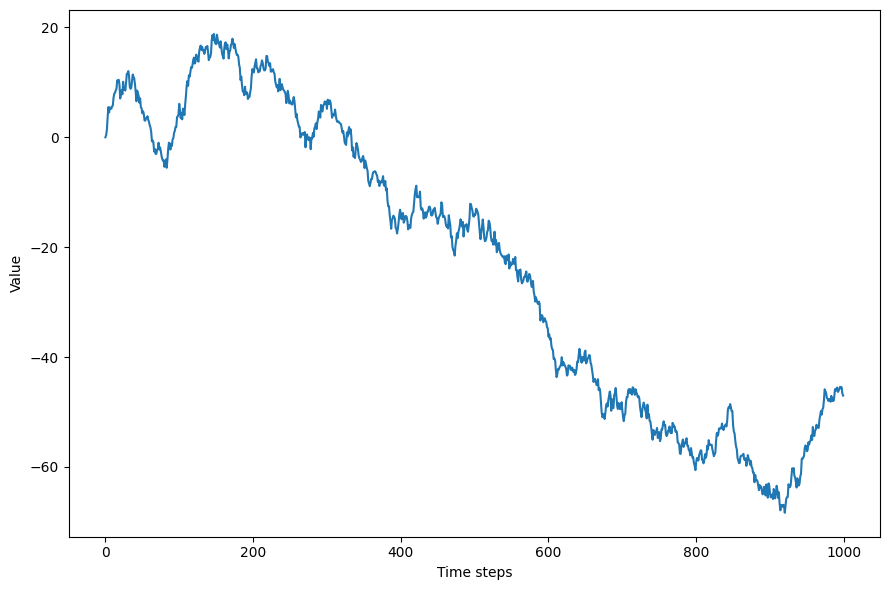

In [5]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Time steps')
ax.set_ylabel('Value')

plt.tight_layout()

### Compare a stationary and a non-stationary series

In [ ]:
fig, ax = plt.subplots()

ax.plot(stationary, linestyle='-', label='stationary')
ax.plot(non_stationary, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.legend(loc=2)

plt.tight_layout()

In [ ]:
fig, ax = plt.subplots()

ax.plot(stationary_mean, label='stationary')
ax.plot(non_stationary_mean, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Mean')
ax.legend(loc=1)

plt.tight_layout()

In [ ]:
fig, ax = plt.subplots()

ax.plot(stationary_var, label='stationary')
ax.plot(non_stationary_var, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Variance')
ax.legend(loc=2)

plt.tight_layout()

### using the Augmented Dickey-Fuller (ADF) test for stationarity

In [ ]:
plt.plot(diff_random_walk)
plt.title('Differenced Random Walk')
plt.xlabel('Timesteps')
plt.ylabel('Value')

plt.tight_layout()

### Plot the autocorrelation function (ACF)

## Is AMZN a random walk?

In [ ]:
# Daily closing price of AMZN (Amazon) stock from October 5th 2021 to October 5th 2022


In [ ]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [19, 40, 62, 82, 101, 123, 144, 165, 186, 206, 229, 250],
    ['Nov', 'Dec', 'Jan 2022', 'Feb', 'Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

plt.title('Daily closing price of AMZN from Oct. 5th 2021 to Oct. 5th 2022')
fig.autofmt_xdate()
plt.tight_layout()

## Forecasting a random walk
### Forecasting on a long horizon

In [ ]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.axvspan(800, 1000, color='#808080', alpha=0.2)

plt.tight_layout()

In [ ]:
fig, ax = plt.subplots()

ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')

ax.axvspan(800, 1000, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.title('Forecasting a simulated random walk')

plt.tight_layout()

#### Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error

mae_mean = mean_absolute_error(test['value'], test['pred_mean'])
mae_last = mean_absolute_error(test['value'], test['pred_last'])
mae_drift = mean_absolute_error(test['value'], test['pred_drift'])

In [ ]:
fig, ax = plt.subplots()

x = ['mean', 'last_value', 'drift']
y = [mae_mean, mae_last, mae_drift]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MAE')
ax.set_ylim(0, 45)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.5, s=str(round(value, 2)), ha='center')

plt.title('MAE of each forecasting method')
plt.tight_layout()

### Forecasting the closing price of AMZN

Forecast the last 50 time steps of the AMZN closing price

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(AMZN_df['Date'], AMZN_df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [19, 40, 62, 82, 101, 123, 144, 165, 186, 206, 229, 250],
    ['Nov', 'Dec', 'Jan 2022', 'Feb', 'Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

ax.axvspan(203, 252, color='#808080', alpha=0.2)

plt.title('Daily closing price of AMZN from Oct. 5th 2021 to Oct. 5th 2022')

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
# Predict the historical mean

# Predict the mean of the last known 50 days

# Predict the last known value

# Predict with drift


In [ ]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(AMZN_train['Close'])
ax.plot(AMZN_test['Close'])
ax.plot(AMZN_test['pred_mean'])
ax.plot(AMZN_test['pred_mean_50'])
ax.plot(AMZN_test['pred_last'])
ax.plot(AMZN_test['pred_drift'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [19, 40, 62, 82, 101, 123, 144, 165, 186, 206, 229, 250],
    ['Nov', 'Dec', 'Jan 2022', 'Feb', 'Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

ax.axvspan(203, 252, color='#808080', alpha=0.2)

plt.title('Daily closing price of AMZN from Oct. 5th 2021 to Oct. 5th 2022')

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
mae_mean = mean_absolute_error(AMZN_test['Close'], AMZN_test['pred_mean'])
mae_mean_50 = mean_absolute_error(AMZN_test['Close'], AMZN_test['pred_mean_50'])
mae_last = mean_absolute_error(AMZN_test['Close'], AMZN_test['pred_last'])
mae_drift = mean_absolute_error(AMZN_test['Close'], AMZN_test['pred_drift'])

fig, ax = plt.subplots()

x = ['mean', 'mean_50', 'last_value', 'drift']
y = [mae_mean, mae_mean_50, mae_last, mae_drift]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MAE')
ax.set_ylim(0, 25)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.5, s=str(round(value, 2)), ha='center')

plt.title('MAE of each forecasting method')
plt.tight_layout()

### Forecasting the next time step

In [ ]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc='best')

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

#### Evaluation

In [ ]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlim(900, 1000)
ax.set_ylim(-70, -40)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.title('Forecasting the next timestep of a random walk')

plt.tight_layout()